# Kappa experiment

In [35]:
%matplotlib inline

import pickle
import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 15})

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
# `/data/images/Orion.cont.image.fits`

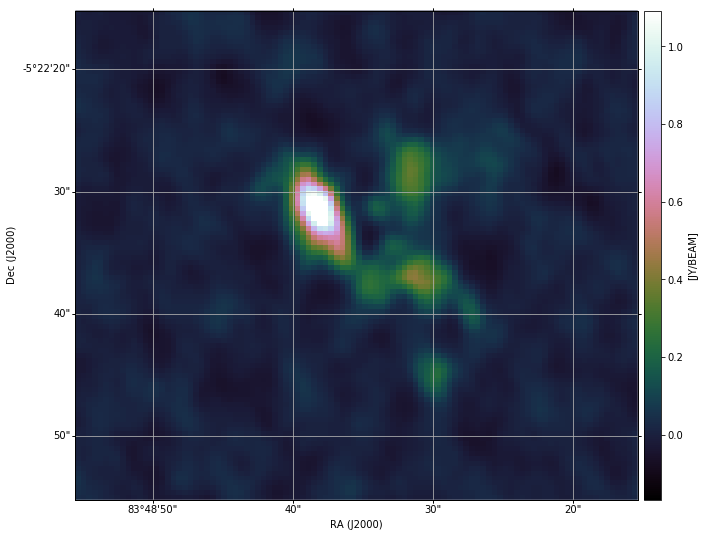

In [19]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

#data,wcs,hdu,spec = load_data(fits_path)

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [20]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

In [22]:
all_results = dict()
kappa_values = np.arange(0.1, 5.1, 0.1)
for n_gaussians in range(200, 401, 50):
    res_rms_list = []
    res_inf_list = []
    time_list = []
    for kappa in kappa_values:
        hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_gaussians=n_gaussians, eps=100., kappa=kappa)
        hdmc.build_gmr()
        res_rms,res_inf,_,_,_ = hdmc.get_residual_stats(verbose=False)
        res_rms_list.append(res_rms)
        res_inf_list.append(res_inf)
        time_list.append(hdmc.elapsed_time)
        hdmc_list.append(hdmc)
    all_results[str(n_gaussians)+"_gs"] = (res_rms_list, res_inf_list, time_list)

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.0801805011133243
Inf norm of residual: 0.3980300428576462
Variance of residual: 0.005383524952780383
Normalized flux addition: 0.06991225038272002
Normalized flux lost: 0.28637576662374903


[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 749 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.03564810812353019
Inf norm of residual: 0.14905282666210085
Variance of residual: 0.0012693795617

In [25]:
with open('exp-kappa-orionKL.pickle', 'wb') as handle:
    pickle.dump(all_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

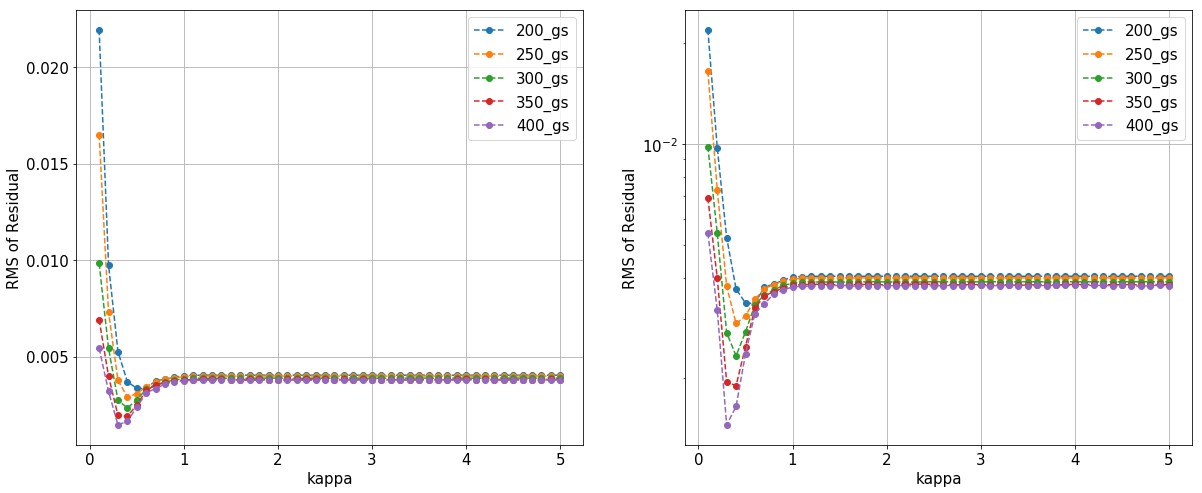

In [36]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for k,v in all_results.items():
    (res_rms_list, _, _) = v
    plt.plot(kappa_values, res_rms_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("RMS of Residual")
    plt.grid()
    plt.legend(loc="best")
plt.subplot(1,2,2)
for k,v in all_results.items():
    (res_rms_list, _, _) = v
    plt.semilogy(kappa_values, res_rms_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("RMS of Residual")
    plt.grid()
    plt.legend(loc="best")
plt.show()

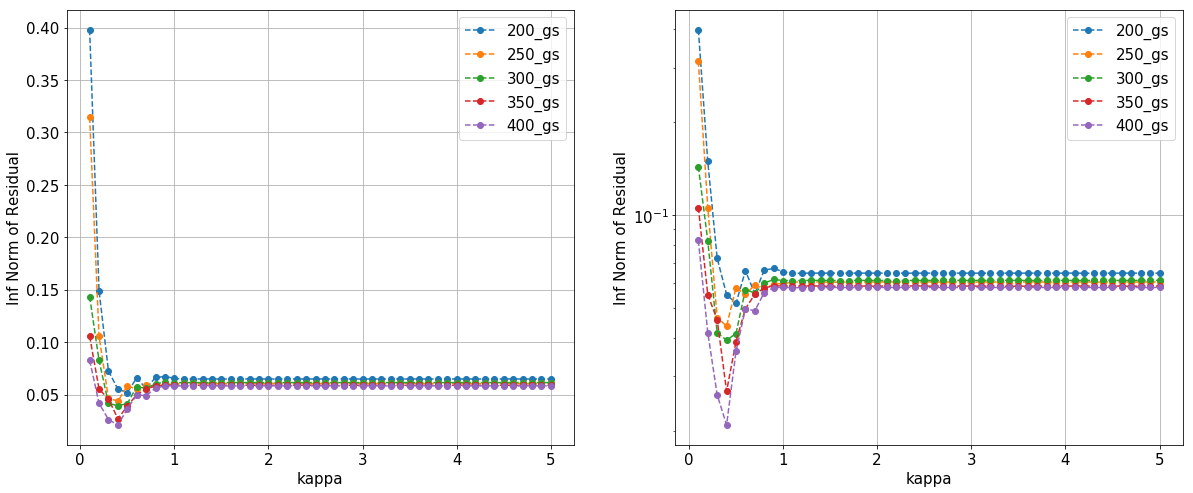

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for k,v in all_results.items():
    (_, res_inf_list, _) = v
    plt.plot(kappa_values, res_inf_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("Inf Norm of Residual")
    plt.grid()
    plt.legend(loc="best")
plt.subplot(1,2,2)
for k,v in all_results.items():
    (_, res_inf_list, _) = v
    plt.semilogy(kappa_values, res_inf_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("Inf Norm of Residual")
    plt.grid()
    plt.legend(loc="best")
plt.show()

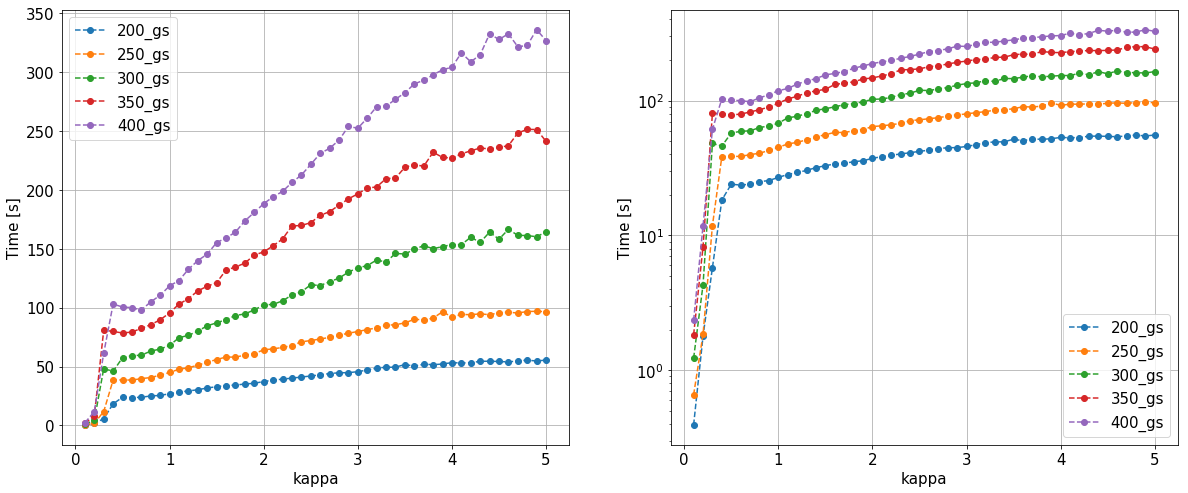

In [38]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for k,v in all_results.items():
    (_,_, time_list) = v
    plt.plot(kappa_values, time_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("Time [s]")
    plt.grid()
    plt.legend(loc="best")
plt.subplot(1,2,2)
for k,v in all_results.items():
    (_,_, time_list) = v
    plt.semilogy(kappa_values, time_list, "o--", label=k)
    plt.xlabel("kappa")
    plt.ylabel("Time [s]")
    plt.grid()
    plt.legend(loc="best")
plt.show()

***

***
# `/data/SCIMES/orion_12CO_mom0.fits`

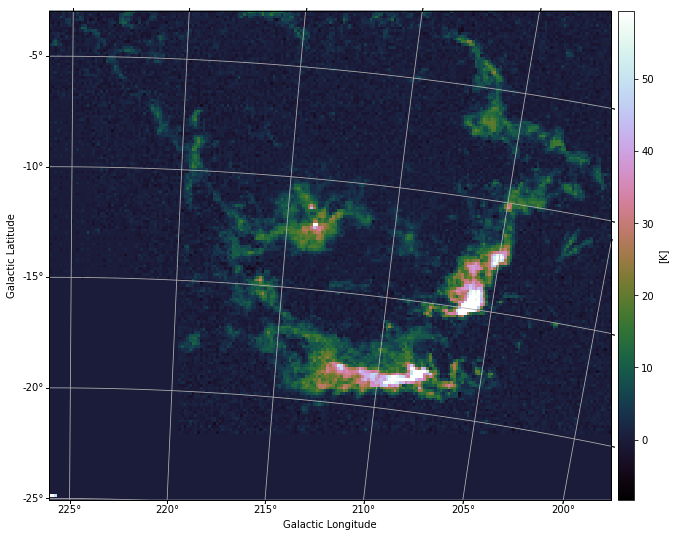

In [5]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [10]:
res_rms_list = []
res_inf_list = []
time_list = []
hdmc_list = []
kappa_values = np.arange(0.1, 5.1, 0.1)

for kappa in kappa_values:
    hdmc = HDMClouds(data, back_level=1.5, wcs=wcs, verbose=False, n_gaussians=250, eps=100., kappa=kappa)
    hdmc.build_gmr()
    res_rms,res_inf,_,_,_ = hdmc.get_residual_stats(verbose=False)
    res_rms_list.append(res_rms)
    res_inf_list.append(res_inf)
    time_list.append(hdmc.elapsed_time)
    hdmc_list.append(hdmc)

[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.157658406785298%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.11803492747338469
Inf norm of residual: 0.7493125442779611
Variance of residual: 0.012343527604857614
Normalized flux addition: 0.28177389405198566
Normalized flux lost: 0.8420721778755201


[INFO] Number of pixels with significant emission: 6013
[INFO] Level of compression: 4.157658406785298%
[INFO] Number of ICEs: 1
Isolated Cloud Entity A: 6013 pixels of significant emission.
---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.05730290280647526
Inf norm of residual: 0.43894087013974736
Variance of residual: 0.00257087944

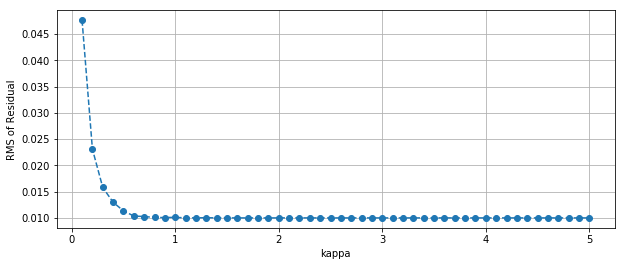

In [13]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

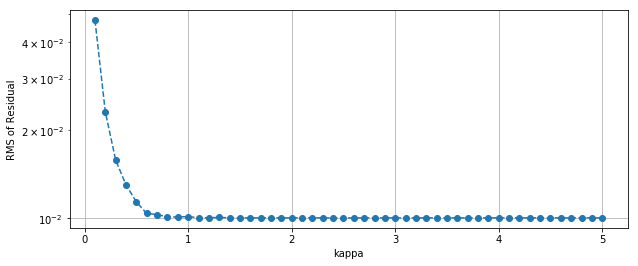

In [14]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_rms_list, "o--")
plt.xlabel("kappa")
plt.ylabel("RMS of Residual")
plt.grid()

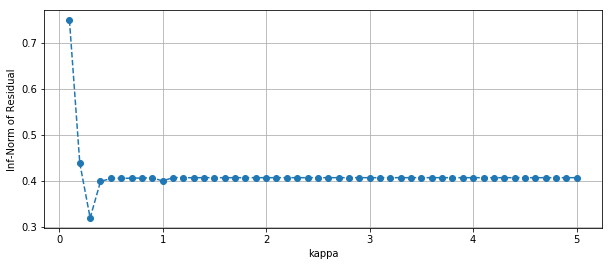

In [15]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

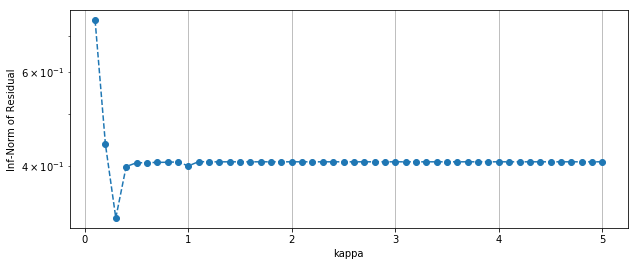

In [16]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, res_inf_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Inf-Norm of Residual")
plt.grid()

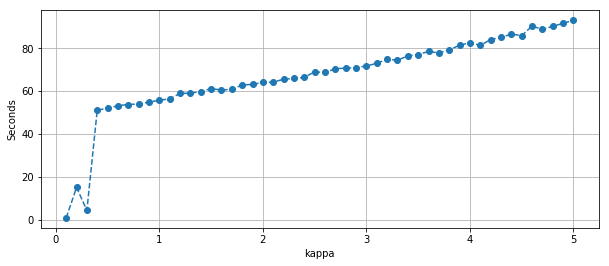

In [17]:
plt.figure(figsize=(10,4))
plt.plot(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

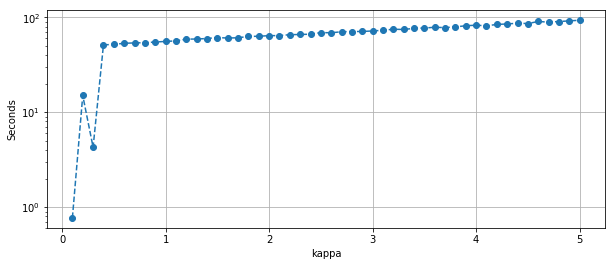

In [18]:
plt.figure(figsize=(10,4))
plt.semilogy(kappa_values, time_list, "o--")
plt.xlabel("kappa")
plt.ylabel("Seconds")
plt.grid()

todo: 

1. try with different values of n_center
2. run with cube

***